In [3]:
import matplotlib.pyplot as plt

from tick.plot import plot_hawkes_kernels
import numpy as np
import matplotlib.pyplot as plt

from tick.hawkes import HawkesKernel0, HawkesKernelExp, HawkesKernelPowerLaw, HawkesKernelTimeFunc,HawkesKernelSumExp
import matplotlib.pyplot as plt
import numpy as np
from tick.base import TimeFunction
from tick.plot import plot_timefunction

from tick.plot import plot_point_process
from tick.hawkes import SimuHawkes, HawkesKernelSumExp,HawkesExpKern
import matplotlib.pyplot as plt
import pickle





## Define Triggering Kernels for Simulation

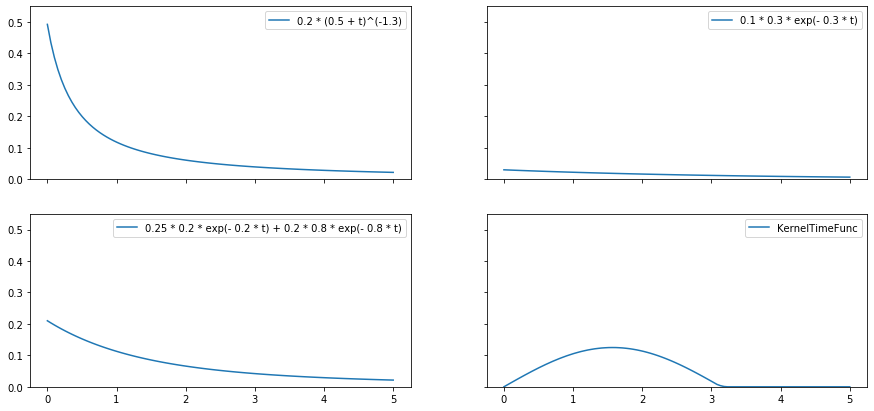

In [4]:

t = np.arange(0,5,0.1)
tc = t.copy()
tc[tc>4] =0
sin = np.sin(tc)/8
sin[sin <0] =0
kernel_4 = HawkesKernelTimeFunc(t_values=t, y_values=sin)
kernel_2 = HawkesKernelExp(.1, 0.3)
kernel_3 = HawkesKernelSumExp(intensities = np.array([0.25,0.2]),decays = np.array([0.2,0.8]))
kernel_1 = HawkesKernelPowerLaw(0.2, 0.5, 1.3)

t_values = np.array([0, 1, 1.5, 1.8, 2.7])
y_values = np.array([0, .6, .34, .2, .1])
kernel_tf = HawkesKernelTimeFunc(t_values=t_values, y_values=y_values)

kernels = [[kernel_1, kernel_2], [kernel_3, kernel_4]]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 7))

t_values = np.linspace(0, 5, 100)
for i in range(2):
    for j in range(2):
        ax[i, j].plot(t_values, kernels[i][j].get_values(t_values),
                      label=kernels[i][j])
        ax[i, j].legend()
        ax[i, j].set_ylim(0,0.55)
plt.show()

In [20]:
run_time = 200
hawkes = SimuHawkes(n_nodes=2, end_time=200, verbose=False, seed=42)
# hawkes = SimuHawkes([[kernel_1,kernel_2],[kernel_3,kernel_4]],baseline=[0.1,0.2],end_time=200, verbose=False, seed=42)


hawkes.set_kernel(0, 0, kernel_1)
hawkes.set_kernel(0, 1, kernel_2)
hawkes.set_kernel(1, 0, kernel_3)
hawkes.set_kernel(1, 1, kernel_4)
hawkes.set_baseline(0, 0.1)
hawkes.set_baseline(1, 0.2)

dt = 0.01
hawkes.track_intensity(dt)

hawkes.simulate()
timestamps = hawkes.timestamps

In [23]:
intensity = hawkes.tracked_intensity
intensity_times = hawkes.intensity_tracked_times

In [28]:
len(intensity[0])

20235

In [26]:
len(intensity_times)

20235

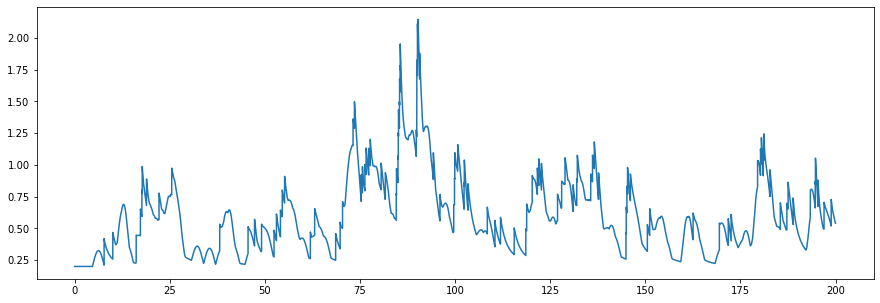

In [35]:
plt.figure(figsize=(15,5))

plt.plot(intensity_times,intensity[1])


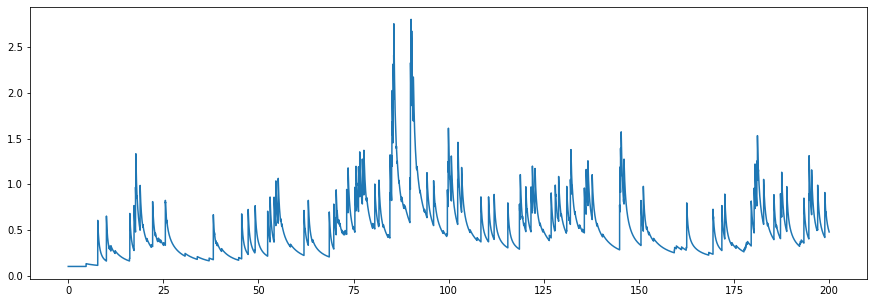

In [36]:
plt.figure(figsize=(15,5))

plt.plot(intensity_times,intensity[0])
